In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline


In [4]:
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)

In [8]:
display(df)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [9]:
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    

In [10]:
print(sse)

[550.8953333333334, 86.39021984551397, 31.412885668276978, 19.48300089968511, 14.130893864755937, 13.099670662670661, 9.489789904927136, 7.711105935127677, 6.514232636644403, 6.224547385620914]


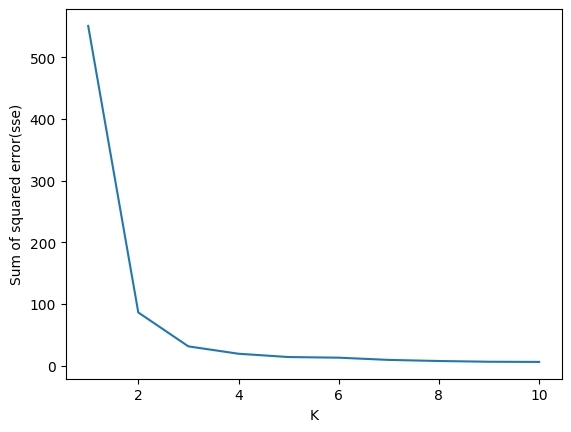

In [12]:
#Elbow plot

plt.xlabel('K')
plt.ylabel('Sum of squared error(sse)')
plt.plot(range(1,11),sse)

In [13]:
# The elbow point is at 3. Hence K=3

km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
print(yp)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
df.drop(['y_predict'], axis='columns', inplace=True)

In [19]:
df['cluster'] = yp
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


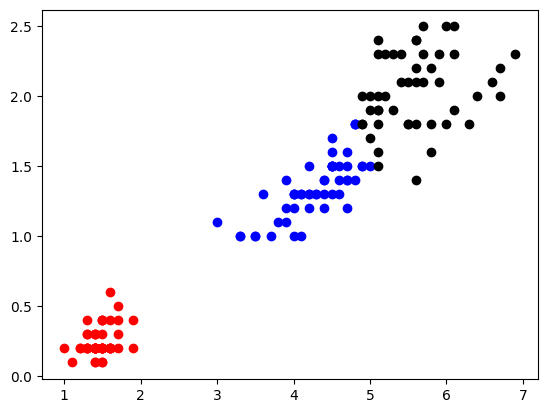

In [21]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color='black')

In [22]:
km_centroids = km.cluster_centers_
print(km_centroids)

[[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]]


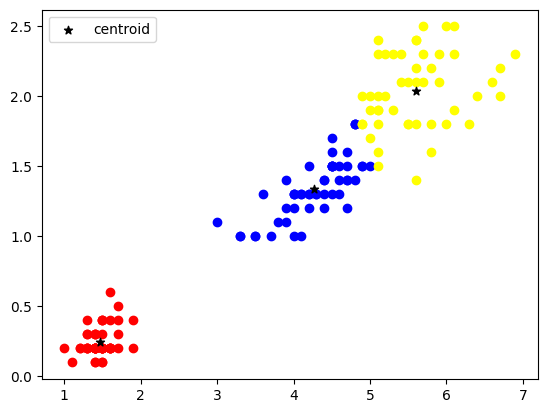

In [26]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color='yellow')

plt.scatter(km_centroids[:,0], km_centroids[:,1], color='black', marker='*', label='centroid')
plt.legend()